In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/DataSci/Python/Py_Stats/hw4/water.csv', usecols=[1,2,3,4])

In [3]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

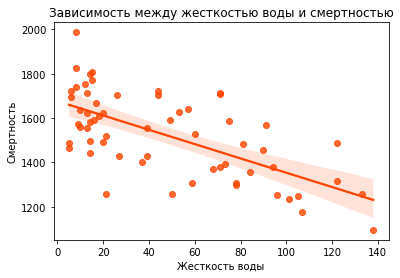

In [4]:
#Построить точечный график
'''Мы видим линейную взаимосвязь, хоть она и очень крепкая такак как разброс вдоль линии существенный, 
также видим, что при низкой жесткости наибольшее количетсво смертей - максимальные значения именно в это области
'''
sns.regplot(data=df, x='hardness', y='mortality', color='orangered')
plt.title('Зависимость между жесткостью воды и смертностью', fontdict={'size':12})
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})
plt.show()

In [5]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
'''Так как оба коэффициента лежат в пределах от -0,5 до -0,74 и ближе ко второй границе, 
то корреляция является высокой отрицательной, также потому, что знак отрицательный.
'''
print(f"Коэффициент Пирсона: {round(df[['hardness', 'mortality']].corr()['mortality'][0], 4)}")
print(f"Коэффициент Спирмена: {round(df[['hardness', 'mortality']].corr(method='spearman')['mortality'][0], 4)}")

Коэффициент Пирсона: -0.6548
Коэффициент Спирмена: -0.6317


In [6]:
#Построить модель линейной регрессии
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=38)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1650.00610568, 1638.65686372, 1556.37485957, 1505.30327078,
       1369.11236735, 1610.28375884, 1556.37485957, 1624.47031128,
       1437.20781906, 1289.66767368, 1644.3314847 , 1363.43774637,
       1621.63300079, 1474.09285541, 1627.30762177, 1627.30762177,
       1428.6958876 , 1380.4616093 , 1400.32278272])

In [7]:
#Рассчитать коэффициент детерминации
'''Коэффициент не очень высокий, но приемлемый, опираться исключительно на эти данные и делать по ним прогноз не стоит, 
но использовать можно.
'''
model.score(X_test, y_test)

0.6642139863355059

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(42, 1)
(19, 1)
(42,)


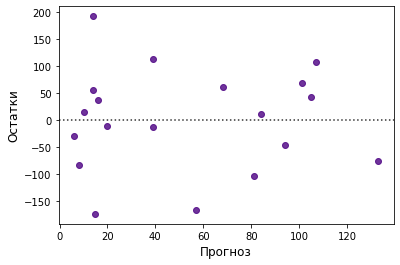

In [9]:
#Вывести график остатков
'''
Остатки распределны рандомно и равномерно, хоть и в левой части видим небольшое скопление, модель работает нормально
'''
sns.residplot(x=X_test, y=y_pred-y_test, color='indigo')
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()

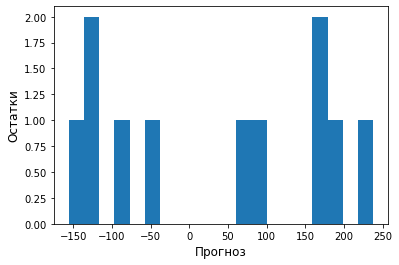

In [75]:
'''
По гистограмме не сказать чтобы было все "гладко". 
Как интерпретировать не знаю, но видно, что значений всего 2 и хвосты разные
'''
plt.hist(y_pred-y_test, bins=20)
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

In [26]:
df_north = df[df['location'] == 'North']  
df_south = df[df['location'] == 'South']  

In [27]:
df_north.head(5)

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [28]:
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### СЕВЕР

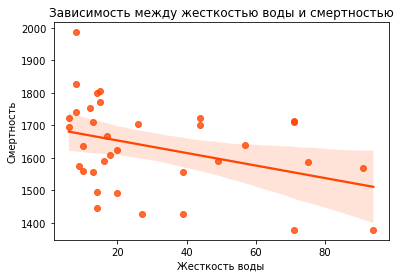

In [29]:
#Построить точечный график
'''Мы видим обратная линейная взаимосвязь, довольно слабую, разброс большой, 
также видим, что при низкой жесткости наибольшее количетсво смертей - максимальные значения именно в этой области
'''
sns.regplot(data=df_north, x='hardness', y='mortality', color='orangered')
plt.title('Зависимость между жесткостью воды и смертностью', fontdict={'size':12})
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})
plt.show()

In [42]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
'''Так как оба коэффициента лежат в пределах от -0,25 до -0,49, то корреляция средняя отрицательная.
'''
print(f"Коэффийиент корреляции Пирсона: {round(df_north[['hardness', 'mortality']].corr()['mortality'][0], 4)}")
print(f"Коэффийиент корреляции Спирмена: {round(df_north[['hardness', 'mortality']].corr(method='spearman')['mortality'][0], 4)}")

Коэффийиент корреляции Пирсона: -0.3686
Коэффийиент корреляции Спирмена: -0.4042


In [60]:
#Построить модель линейной регрессии
X = df_north[['hardness']]
y = df_north['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1625.35029935, 1668.08820824, 1553.37066333, 1614.10348122,
       1681.58439   , 1679.33502637, 1677.08566274, 1553.37066333,
       1681.58439   , 1681.58439   , 1584.86175409])

In [61]:
#Рассчитать коэффициент детерминации
'''Коэффициент низкий, модель плохая.
'''
model.score(X_test, y_test)

-0.1250982699915808

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(24, 1)
(11, 1)
(24,)


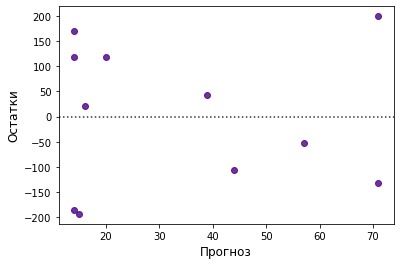

In [67]:
#Вывести график остатков
'''
Остатки распределны рандомно не совсем равномерно равномерно, в левой части видим небольшое скопление, 
Данных мало, для заключения о работоспособности модели
'''
sns.residplot(X_test, y_pred-y_test, color='indigo')
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()

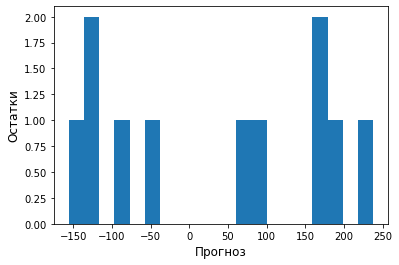

In [74]:
plt.hist(y_pred-y_test, bins=20)
'''
По гистограмме видно что модель плохая - хвосты больше тела
'''
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()

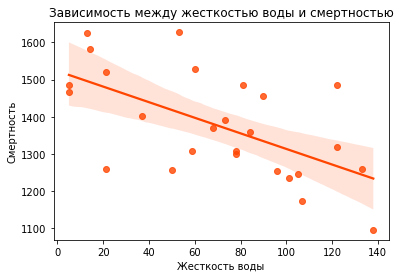

In [32]:
#Построить точечный график - South
'''Взаимосвязь практически отсутствует, хоть и видна обратная линейная корреляция.
'''
sns.regplot(data=df_south, x='hardness', y='mortality', color='orangered')
plt.title('Зависимость между жесткостью воды и смертностью', fontdict={'size':12})
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})
plt.show()

In [85]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
'''Так как оба коэффициента лежат в пределах от -0,5 до -0,74 и ближе ко второй границе, 
то корреляция является высокой отрицательной, хотя по графику я бы так не сказал.
'''
print(f"Коэффициент Пирсона: {round(df_south[['hardness', 'mortality']].corr()['mortality'][0], 4)}")
print(f"Коэффициент Спирмана: {round(df_south[['hardness', 'mortality']].corr(method='spearman')['mortality'][0], 4)}")

Коэффициент Пирсона: -0.6022
Коэффициент Спирмана: -0.5957


In [91]:
#Построить модель линейной регрессии
X = df_south[['hardness']]
y = df_south['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 27)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1421.97087375, 1416.07025525, 1331.49472353, 1321.66035938,
       1447.54022055, 1492.77829565, 1479.01018584, 1494.74516848])

In [93]:
#Рассчитать коэффициент детерминации
'''Коэффициент невысокий, модель не очень хороша.
'''
model.score(X_test, y_test)

0.28310460335810184

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(18, 1)
(8, 1)
(18,)


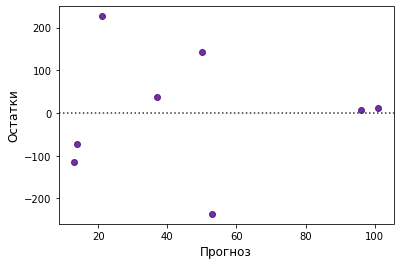

In [96]:
#Вывести график остатков
'''
Остатки распределны рандомно не совсем равномерно. Данных мало, для заключения о работоспособности модели
'''
sns.residplot(X_test, y_pred-y_test, color='indigo')
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()

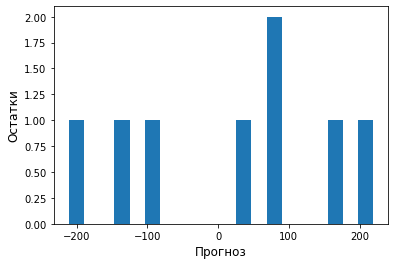

In [97]:
plt.hist(y_pred-y_test, bins=20)
'''
По гистограмме видно что равномерные, но не более того, дополнительное заключениед дать сложно - мало данных.
'''
plt.xlabel('Прогноз', fontdict={'size':12})
plt.ylabel('Остатки', fontdict={'size':12})
plt.show()